# Elements of Data Science Course
## Part 2: Problem Formulation & EDA
Course link: <...>

In [14]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

## Load & view dataset properties

In [2]:
dataset = load_breast_cancer()
cols = []
for i in range(10, 40):
    cols.append(''.join(['V', str(i)]))

df = pd.DataFrame(dataset['data'], columns=cols)
df['target'] = dataset.target
df.head()

,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V10     569 non-null    float64
 1   V11     569 non-null    float64
 2   V12     569 non-null    float64
 3   V13     569 non-null    float64
 4   V14     569 non-null    float64
 5   V15     569 non-null    float64
 6   V16     569 non-null    float64
 7   V17     569 non-null    float64
 8   V18     569 non-null    float64
 9   V19     569 non-null    float64
 10  V20     569 non-null    float64
 11  V21     569 non-null    float64
 12  V22     569 non-null    float64
 13  V23     569 non-null    float64
 14  V24     569 non-null    float64
 15  V25     569 non-null    float64
 16  V26     569 non-null    float64
 17  V27     569 non-null    float64
 18  V28     569 non-null    float64
 19  V29     569 non-null    float64
 20  V30     569 non-null    float64
 21  V31     569 non-null    float64
 22  V3

In [6]:
# Show descriptive/summary stats
df.describe()

,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# Show target variable value distribution
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## Basic EDA Visualizations

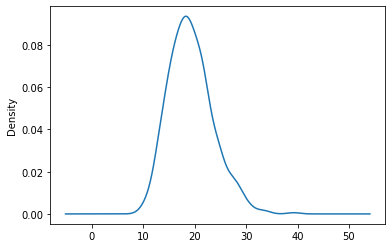

In [8]:
# Density curve
df['V11'].plot.kde()
plt.show()

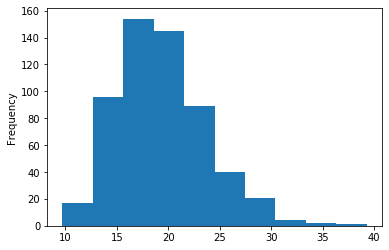

In [9]:
# Histogram
df['V11'].plot.hist()
plt.show()

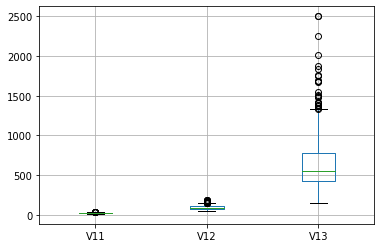

In [10]:
# Box plot
# *Note diff syntax for boxplot!
df.boxplot(['V11', 'V12', 'V13'])
plt.show()

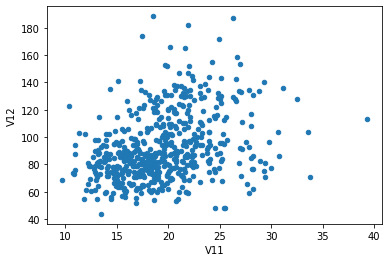

In [11]:
# Single scatter plot
df.plot.scatter(x='V11', y='V12')
plt.show()

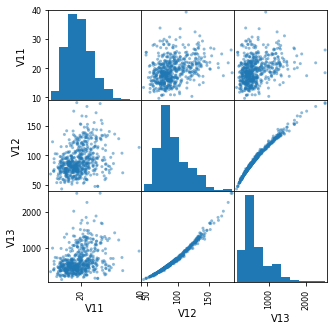

In [12]:
# Scatter matrix
pd.plotting.scatter_matrix(df[['V11', 'V12', 'V13']], figsize=(5, 5))
plt.show()

## Correlations

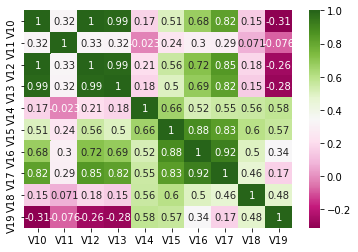

In [18]:
abbrev_cols = cols[:10]
heatmap = np.corrcoef(df[abbrev_cols].values.T)
sns.heatmap(heatmap, yticklabels=abbrev_cols, xticklabels=abbrev_cols, cmap='PiYG', annot=True)
plt.show()